In [7]:
import seaborn as sb
import pandas as pd
import kneed
from matplotlib import pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import numpy as np

In [8]:
def read_file(url):

    url = url + "?raw=true"
    df = pd.read_csv(url, encoding='cp1252', sep=',', low_memory=False)
    return df

In [9]:
url = "https://github.com/hannahgathu/Thesis-Data-Visualisations/blob/main/All_Data_Prepped.csv"

df= read_file(url).iloc[:65378,:]

In [10]:
features= df.iloc[:,3:]

## Scaling the features

In [11]:
# scaler = StandardScaler()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

## Checking number of clusters

In [12]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

### Elbow method
The elbow method suggests that there are 5 clusters.

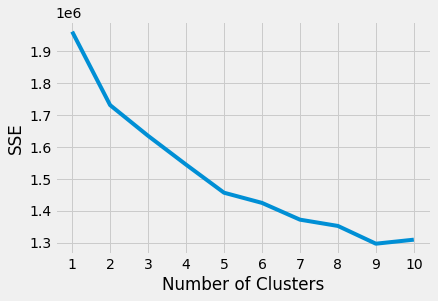

In [13]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 11), sse)
 plt.xticks(range(1, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

In [14]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

5

In [15]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

### Silhouette method
The silhouette method suggests that 2 or 3 clusters would be better than 5. However, the silhouette scores seem pretty bad for either of the options..

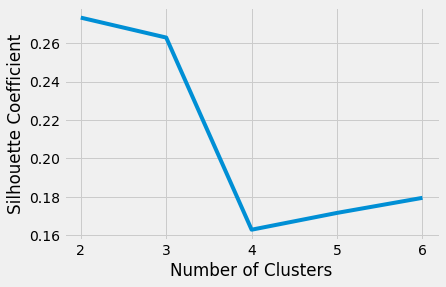

In [16]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 7), silhouette_coefficients)
plt.xticks(range(2, 7))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## K-means with 5 clusters

In [17]:
kmeans = KMeans(
    init="random",
    n_clusters=5,
    n_init=10,
    max_iter=300
)

In [18]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=5)

In [19]:
# The lowest SSE value
kmeans.inertia_

1456681.1961303742

In [20]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-2.30343148e-01, -9.00631456e-02, -3.97830646e-03,
         1.32059576e-02,  5.95729977e-01,  8.52500226e-01,
         6.82899477e-01, -4.69021533e-03, -4.69367506e-03,
         7.38097146e-01,  7.64510691e-01,  1.01227391e+00,
        -9.44303826e-02, -7.17696749e-02,  2.73209625e-01,
        -8.69350066e-02, -1.43595430e-01, -4.11972310e-03,
         5.17986677e-03, -1.73411307e-01,  4.02683552e-03,
         4.06577650e-03, -1.42176230e-01, -9.73998720e-03,
        -9.04545276e-02, -5.20029904e-02,  1.71554216e-02,
        -6.81677234e-01, -2.01365330e-01,  1.28969305e-02],
       [ 4.80116679e-03, -2.64558513e-02, -3.97957838e-03,
        -9.34978405e-03, -7.91194602e-02, -3.77961766e-01,
        -2.49285894e-02, -4.69020070e-03, -4.69366037e-03,
        -1.15929111e-01, -1.97870154e-01, -6.08229131e-01,
        -2.13371063e-01, -2.33842106e-02, -1.64279911e-02,
        -7.99753120e-02, -2.53055971e-01, -4.11965090e-03,
        -3.00523363e-03, -1.65788709e-01,  4.00409122e-

In [21]:
# The number of iterations required to converge
kmeans.n_iter_

46

In [28]:
kmeans_silhouette = silhouette_score(
    scaled_features, kmeans.labels_
).round(2)

kmeans_silhouette

0.17

### Scatter plot of clusters: log kow vs BIOWIN4

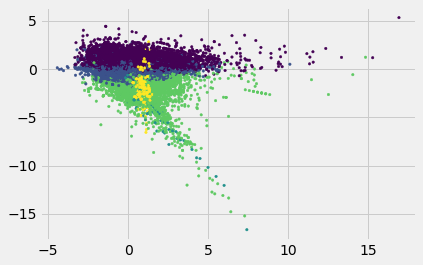

In [22]:
plt.scatter(scaled_features[:, 12], scaled_features[:, 9], s=6,c=kmeans.labels_, cmap='viridis', alpha=1);

(-5.0, 5.0)

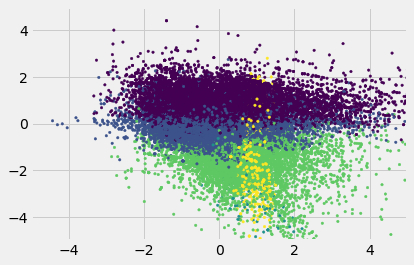

In [23]:
#zoomed in
plt.scatter(scaled_features[:, 12], scaled_features[:, 9], s=6,c=kmeans.labels_, cmap='viridis');
plt.xlim(-5, 5)
plt.ylim(-5, 5)

### Log kow vs molecular weight

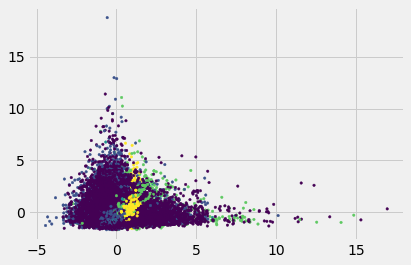

In [24]:
plt.scatter(scaled_features[:, 12], scaled_features[:, 26], s=6, c=kmeans.labels_, cmap='viridis');

### Looking at the labeled data only
I wanted to see whether the clusters found by k-means on the big dataset corresponded to the clusters found by only looking at the labeled data, so I filtered to only the data that is included in Bendik's dataset to compare

In [25]:
is_labeled=df.iloc[:,32]

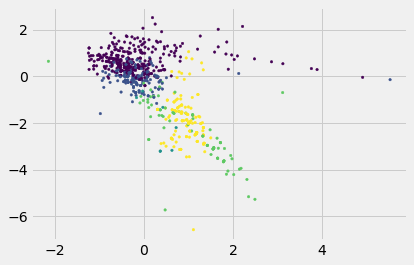

In [26]:
#showing the labeled (PBT concern/Bendik data only)
scaled_features_labeled = scaled_features[is_labeled == 1]
features_labeled = features.to_numpy()[is_labeled == 1]
kmeans_labels_labeled = kmeans.labels_[is_labeled == 1]

#Showing PBT concern data only: log kow vs BIOWIN4
plt.scatter(scaled_features_labeled[:, 12], scaled_features_labeled[:, 9], s=6,c=kmeans_labels_labeled, cmap='viridis');


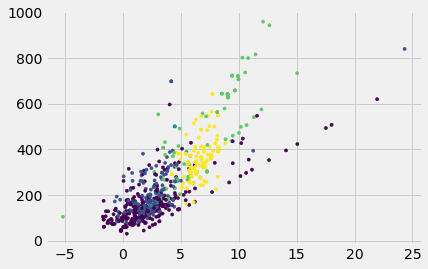

In [29]:
#Showing PBT concern data only: log kow vs MW
plt.scatter(features_labeled[:, 12], features_labeled[:, 26], s=10,c=kmeans_labels_labeled, cmap='viridis');

## K-Means with 2 clusters

In [56]:
kmeans2 = KMeans(
    init="random",
    n_clusters=2,
    n_init=10,
    max_iter=300
)

In [57]:
kmeans2.fit(scaled_features)

KMeans(init='random', n_clusters=2)

In [58]:
# The number of iterations required to converge
kmeans2.n_iter_

15

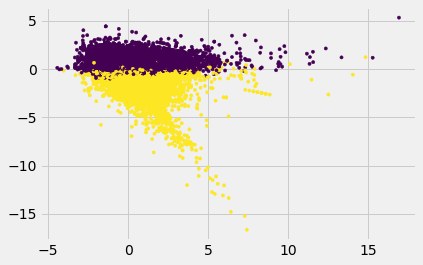

In [72]:
#scatter log kow vs biowin4
plt.scatter(scaled_features[:, 12], scaled_features[:, 9], s=10, c=kmeans2.labels_, cmap='viridis');

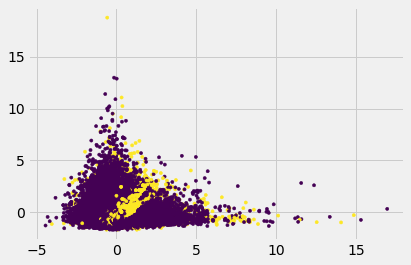

In [110]:
#log kow vs mw
plt.scatter(scaled_features[:, 12], scaled_features[:, 26], s=10, c=kmeans2.labels_, cmap='viridis');

### Looking at the labeled data only
I wanted to see whether the clusters found by k-means on the big dataset corresponded to the clusters found by only looking at the labeled data, so I filtered to only the data that is included in Bendik's dataset to compare it to the clustering found on that data only. It seems similar, judging from this plot

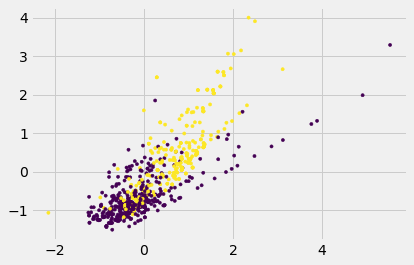

In [87]:
kmeans2_labels_labeled = kmeans2.labels_[is_labeled == 1]
#log kow vs mw
plt.scatter(scaled_features_labeled[:, 12], scaled_features_labeled[:, 26], s=10, c=kmeans2_labels_labeled, cmap='viridis');

## K-Means with 3 clusters
I also tried K-means with 3 clusters, because it had a high silhouette score. It seems to give very similar results to k-means with 2 clusters.

In [96]:
kmeans3 = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300
)

In [97]:
kmeans3.fit(scaled_features)

KMeans(init='random', n_clusters=3)

In [98]:
# The number of iterations required to converge
kmeans3.n_iter_

16

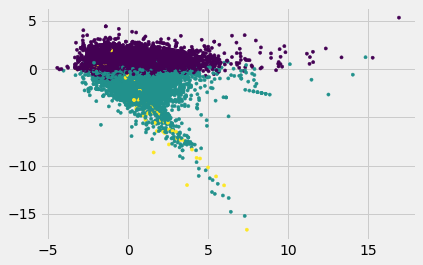

In [108]:
#scatter log kow vs biowin4
plt.scatter(scaled_features[:, 12], scaled_features[:, 9], s=10, c=kmeans3.labels_, cmap='viridis');

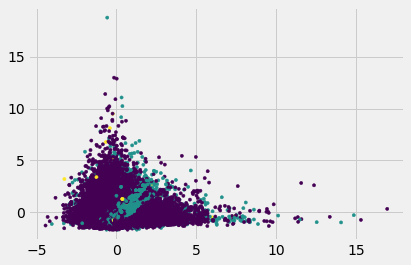

In [100]:
#log kow vs mw
plt.scatter(scaled_features[:, 12], scaled_features[:, 26], s=10, c=kmeans3.labels_, cmap='viridis');

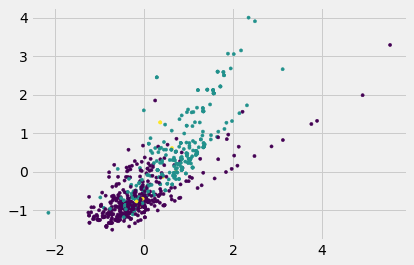

In [102]:
kmeans3_labels_labeled = kmeans3.labels_[is_labeled == 1]
#log kow vs mw
plt.scatter(scaled_features_labeled[:, 12], scaled_features_labeled[:, 26], s=10, c=kmeans3_labels_labeled, cmap='viridis');

## Gaussian Mixture model with 2 clusters
The GMM gives a very different cluster structure  than k-means (judging from this scatterplot). For log kow and BIOWIN4/MW we see much less of a clear division between the clusters.

In [160]:
from sklearn.mixture import GaussianMixture

In [161]:
gmm = GaussianMixture(n_components=2)
gmm.fit(scaled_features)

GaussianMixture(n_components=2)

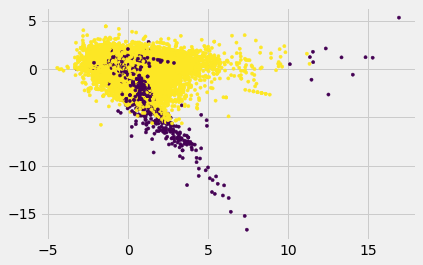

In [165]:
labels = gmm.predict(scaled_features)
plt.scatter(scaled_features[:, 12], scaled_features[:, 9], s=10, c=labels, cmap='viridis');

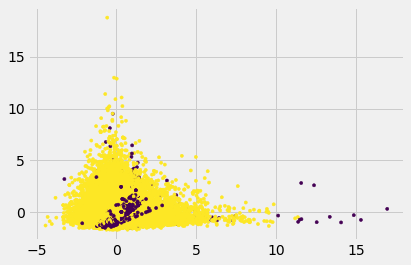

In [167]:
gmm_labels = gmm.predict(scaled_features)
plt.scatter(scaled_features[:, 12], scaled_features[:, 26], s=10, c=gmm_labels, cmap='viridis');

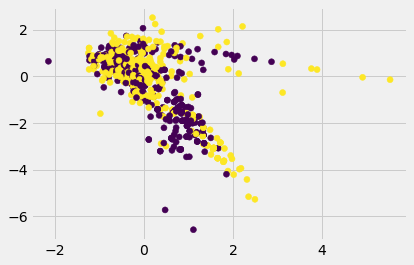

In [169]:
gmm_labels_labeled = gmm_labels[is_labeled == 1]
plt.scatter(scaled_features_labeled[:, 12], scaled_features_labeled[:, 9], c=gmm_labels_labeled, cmap='viridis');

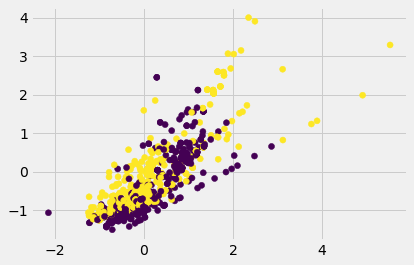

In [170]:
plt.scatter(scaled_features_labeled[:, 12], scaled_features_labeled[:, 26], c=gmm_labels_labeled, cmap='viridis');

## Gaussian Mixture model with 5 clusters

In [174]:
gmm5 = GaussianMixture(n_components=5)
gmm5.fit(scaled_features)

GaussianMixture(n_components=5)

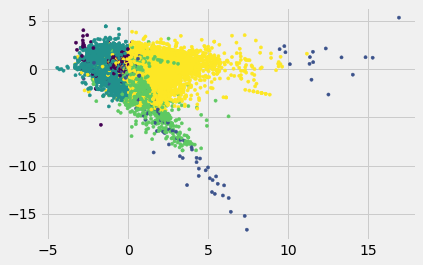

In [175]:
gmm5_labels = gmm5.predict(scaled_features)
plt.scatter(scaled_features[:, 12], scaled_features[:, 9], s=10, c=gmm5_labels, cmap='viridis');

## DBSCAN
I had a difficult time choosing the right epsilon value for DBSCAN. 

In [30]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [36]:
dbscan = DBSCAN(eps=2, min_samples=1000)
dbscan.fit(scaled_features)


DBSCAN(eps=2, min_samples=1000)

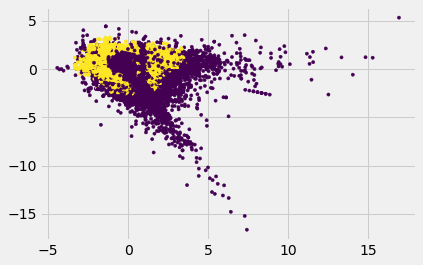

In [39]:
plt.scatter(scaled_features[:, 12], scaled_features[:, 9], s=10, c=dbscan.labels_, cmap='viridis');

In [43]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors()
nbrs = neigh.fit(scaled_features)
distances, indices = nbrs.kneighbors(scaled_features)

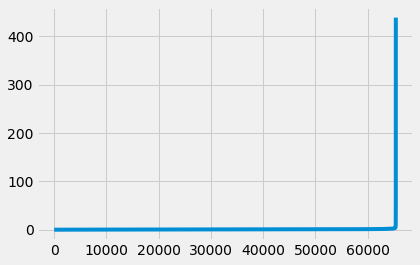

In [44]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)